# 1.1 Kosinusähnlichkeit in Frames
Centroid:
$$ c = \frac{1}{n} \sum_{i=1}^{n} v_i $$

In [33]:
import numpy as np
from scipy.spatial import distance

vectors_cut = np.load('cutting_damaging/Cutting.npy')
vectors_damage = np.load('cutting_damaging/Damaging.npy')

verbs_cut = ['slice', 'dice', 'mince', 'cube', 'chop', 'fillet', 'pare', 'cut', 'carve']
verbs_damage = ['break', 'shatter', 'crack', 'smash', 'fracture', 'splinter', 'rupture', 'damage', 'destroy']


def calc_centroid(vectors):
    return sum(vectors)/ len(vectors)

def calc_cos_sim(vectors, centroid, verbs):
    """
    Kosinusähnlichkeit1 zwischen jedem Verbvektor und dem Zentroiden
    erstelle ein Dictionary mit Verb und Kosinusähnlichkeit
    Dann sortiere Verben samt Kosinusähnlichkeiten in aufsteigender Reihenfolge
    Print die sortierte Liste
    Return das sortierte Dictionary


    """
    cosine_similaritys = []
    for vector in vectors:
        cos_sim = 1 - distance.cosine(vector, centroid)
        cosine_similaritys.append(cos_sim)

    cosine_similaritys = np.array(cosine_similaritys)
    wort_cs_dict = dict(zip(verbs, cosine_similaritys))
    sort_wort_cs_dict = dict(sorted(wort_cs_dict.items(), key=lambda item: item[1]))
    
    print("Sorted by Cosine Similarity to Centroid:\n")
    for verb, cos_sim in sort_wort_cs_dict.items():
        print(f"{verb}: {cos_sim}")
        
    return sort_wort_cs_dict
    


def avg_cosine_similarity(cosine_similaritys):
    return sum(cosine_similaritys) / len(cosine_similaritys)


if __name__ == "__main__":
    centroid_cut = calc_centroid(vectors_cut)
    centroid_damage = calc_centroid(vectors_damage)

    print("Cutting Verbs Cosine Similarities, ")
    sorted_cut = calc_cos_sim(vectors_cut, centroid_cut, verbs_cut)
    avg_cut = avg_cosine_similarity(list(sorted_cut.values()))
    print(f"\nAverage Cosine Similarity for Cutting Verbs: {avg_cut}\n")

    print("Damaging Verbs Cosine Similarities, ")
    sorted_damage = calc_cos_sim(vectors_damage, centroid_damage, verbs_damage)
    avg_damage = avg_cosine_similarity(list(sorted_damage.values()))
    print(f"\nAverage Cosine Similarity for Damaging Verbs: {avg_damage}\n")


Cutting Verbs Cosine Similarities, 
Sorted by Cosine Similarity to Centroid:

pare: 0.4086924461669902
cube: 0.4158035746185611
carve: 0.4852370312224523
cut: 0.5611947443156058
mince: 0.5656747954497424
dice: 0.5735548759208242
fillet: 0.5755527134400646
chop: 0.7116392021529706
slice: 0.7592963681877284

Average Cosine Similarity for Cutting Verbs: 0.56184952794166

Damaging Verbs Cosine Similarities, 
Sorted by Cosine Similarity to Centroid:

smash: 0.2201650087290199
splinter: 0.24249758496666873
shatter: 0.2778851911945106
destroy: 0.3520056802757061
fracture: 0.35269744266631675
damage: 0.3647893393376411
crack: 0.3901520731641439
rupture: 0.4508368628651769
break: 0.4697564360986607

Average Cosine Similarity for Damaging Verbs: 0.34675395769976053




### 1. Welcher der beiden Frames hat eine hohe Intra-Frame-Similarity und welcher eine nicht ganz so hohe?

1.Frame mit Cutting verbs hat höchere Intra-Frame-Similarity und die 2. mit Damaging Verbs niedrige.

#### a) Wie erklären Sie sich dieses Ergebnis?

Alle Cutting verbs sind näher zueinander, weil sie sehr homogene, klar abgegrenzte Handlung beschreiben, und zerstören kann man auf unterschidliche Weise, deswegen sind die Verben semantisch breiter.

### 2. Was fällt Ihnen auf, wenn Sie die Verben nach ihrer Kosinusähnlichkeit zum Zentroiden ordnen?

Die Cutting-Verben liegen relativ eng beieinander, die Damaging-Verben liegen viel diffuser und haben eine deutlich größere Spannweite.

#### a) Welche Verben haben jeweils die höchste Ähnlichkeit zu ihrem Zentroiden?

slice und break liegen beide näher als die anderen zu ihrem Zentroiden.

#### b) Was könnten Gründe dafür sein, dass andere Verben nicht so ähnlich zu ihrem Zentroiden sind?

Die andere Verben beschreiben den Zentroid nicht so gut und können vielleicht andere Bedeutungen haben oder in anderen Kontexten vorkommen.

# 1.2 Plotten von Vektoren

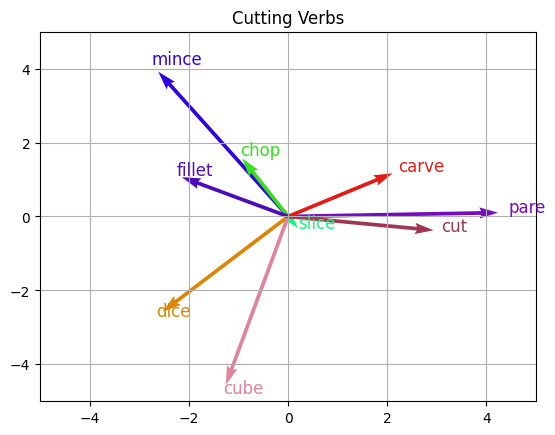

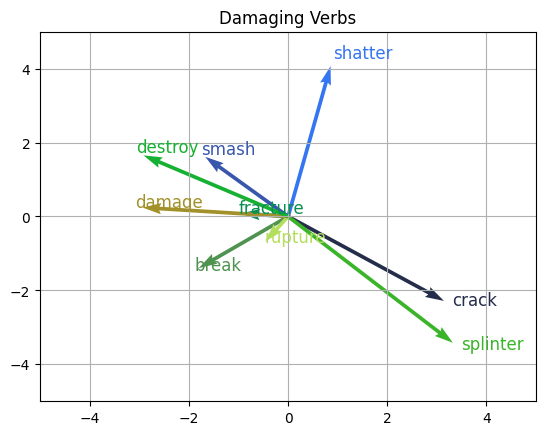

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random


pca = PCA(n_components=2)


vectors_cut_2d = pca.fit_transform(vectors_cut)
vectors_damage_2d = pca.fit_transform(vectors_damage)




def plot_vectors(vectors_dict, title):
    
    plt.figure()
    
    for name, v in vectors_dict.items():
        color = (random.random(), random.random(), random.random())
        plt.quiver(0, 0, v[0], v[1],angles='xy', scale_units='xy', scale=1, color=color)
        plt.text(v[0] * 1.05, v[1] * 1.05, name, color=color, fontsize=12)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.title(title)
    
    plt.show()

plot_vectors(dict(zip(verbs_cut, vectors_cut_2d)), "Cutting Verbs")
plot_vectors(dict(zip(verbs_damage, vectors_damage_2d)), "Damaging Verbs")


